#Problem 2
In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:




1.   President Franklin D. Roosevelt in 1941
2.  President John F. Kennedy in 1961
3.  President Richard Nixon in 1973



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from nltk.stem import WordNetLemmatizer
import re

from wordcloud import WordCloud

from nltk.corpus import inaugural

import warnings
warnings.filterwarnings("ignore")

In [2]:
nltk.download('inaugural')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [4]:
len(inaugural.fileids())

59

Out of the 59 speeches of presidents in the corpus, we focus on three specific speeches: President Roosevelt's speech in 1941, President JFK's speech in 1961, and President Nixon's speech in 1973.

Our primary objective is to analyze Franklin Roosevelt's speech to gain insights into the usage of symbols and punctuation.

In [5]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

Creating separate lists to store speeches, years, names, and other data for automated execution and future analysis.

In [6]:
file_names = ['1941-Roosevelt.txt', '1961-Kennedy.txt', '1973-Nixon.txt']

In [7]:
years = [1941, 1961, 1973]

In [8]:
names = ['Franklin D. Roosevelt', 'John F. Kennedy', 'Richard Nixon']

In [9]:
speeches = []
for i in file_names:
  speeches.append(inaugural.raw(i))

2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)


In [10]:
for i in range(0, len(file_names)):
  print("Characters in President", names[i] + "'s speech in", years[i], "is", len(speeches[i]))

Characters in President Franklin D. Roosevelt's speech in 1941 is 7571
Characters in President John F. Kennedy's speech in 1961 is 7618
Characters in President Richard Nixon's speech in 1973 is 9991


In [11]:
for i in range(0, len(file_names)):
  print("words in President", names[i] + "'s speech in", years[i], "is", len(inaugural.words(file_names[i])))

words in President Franklin D. Roosevelt's speech in 1941 is 1536
words in President John F. Kennedy's speech in 1961 is 1546
words in President Richard Nixon's speech in 1973 is 2028


In [12]:
for i in range(0, len(file_names)):
  print("Sentences in President", names[i] + "'s speech in", years[i], "is", len(inaugural.sents(file_names[i])))

Sentences in President Franklin D. Roosevelt's speech in 1941 is 68
Sentences in President John F. Kennedy's speech in 1961 is 52
Sentences in President Richard Nixon's speech in 1973 is 69


2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.


In [13]:
df = pd.DataFrame(speeches, index = names, columns = ['Speech'])
df

,Speech
Franklin D. Roosevelt,On each national day of inauguration since 178...
John F. Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
Richard Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


Converting text to lower case

In [14]:
df['Speech'] = df['Speech'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
df

,Speech
Franklin D. Roosevelt,on each national day of inauguration since 178...
John F. Kennedy,"vice president johnson, mr. speaker, mr. chief..."
Richard Nixon,"mr. vice president, mr. speaker, mr. chief jus..."


Removing Special Characters & Punctuations

In [15]:
df['Speech'] = df['Speech'].str.replace('[^\w\s]', '')

Removing Stopwords & Punctuation

In [16]:
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)
stopwords.extend(['mr', 'mrs', 'let', 'us'])
df['Speech'] = df['Speech'].apply(lambda x: ' '.join(x for x in x.split() if x not in stopwords))
df

,Speech
Franklin D. Roosevelt,national day inauguration since 1789 people re...
John F. Kennedy,vice president johnson speaker chief justice p...
Richard Nixon,vice president speaker chief justice senator c...


In [17]:
# Snapshot of Roosevelt's speech post stopwords removal
df.iloc[0][0]

'national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding lifes ideals measured material things vit

Checking the character & word count post stopwords removal

In [18]:
df['char_count'] = df['Speech'].str.len()
df['word_count'] = df['Speech'].apply(lambda x: len(str(x).split()))
df

,Speech,char_count,word_count
Franklin D. Roosevelt,national day inauguration since 1789 people re...,4562,618
John F. Kennedy,vice president johnson speaker chief justice p...,4665,663
Richard Nixon,vice president speaker chief justice senator c...,5771,781


2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)


In [19]:
for i in range(0, len(df.index)):
  print("The top 3 words with their count in President", names[i] + "'s speech are:", nltk.FreqDist(df.iloc[i]['Speech'].split()).most_common(3), '\n')

The top 3 words with their count in President Franklin D. Roosevelt's speech are: [('nation', 11), ('know', 10), ('spirit', 9)] 

The top 3 words with their count in President John F. Kennedy's speech are: [('world', 8), ('sides', 8), ('new', 7)] 

The top 3 words with their count in President Richard Nixon's speech are: [('peace', 19), ('world', 16), ('new', 15)] 



Applying stemming to words before generating word clouds, and use a lemmatizer to retain meaningful dictionary format. Check word count for any changes.





In [20]:
lemma = WordNetLemmatizer()
df['Speech'] = df['Speech'].apply(lambda x: ' '.join([lemma.lemmatize(word) for word in x.split()]))

In [21]:
df

,Speech,char_count,word_count
Franklin D. Roosevelt,national day inauguration since 1789 people re...,4562,618
John F. Kennedy,vice president johnson speaker chief justice p...,4665,663
Richard Nixon,vice president speaker chief justice senator c...,5771,781


In [22]:
for i in range(0, len(df.index)):
  print("The top 3 words (post stemming) with their count in President", names[i] + "'s speech are:", nltk.FreqDist(df.iloc[i]['Speech'].split()).most_common(3), '\n')

The top 3 words (post stemming) with their count in President Franklin D. Roosevelt's speech are: [('nation', 15), ('life', 11), ('know', 10)] 

The top 3 words (post stemming) with their count in President John F. Kennedy's speech are: [('world', 8), ('side', 8), ('power', 7)] 

The top 3 words (post stemming) with their count in President Richard Nixon's speech are: [('america', 21), ('peace', 19), ('world', 18)] 



2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)


President Franklin D. Roosevelt's Word Cloud:


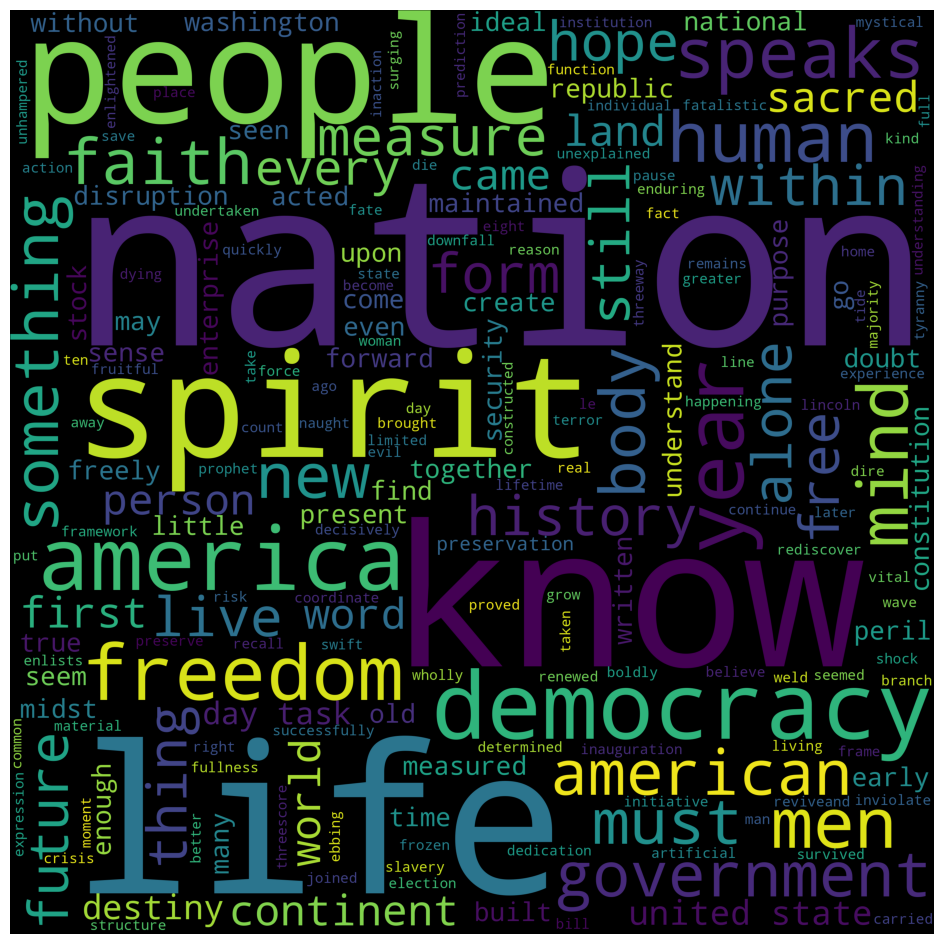



President John F. Kennedy's Word Cloud:


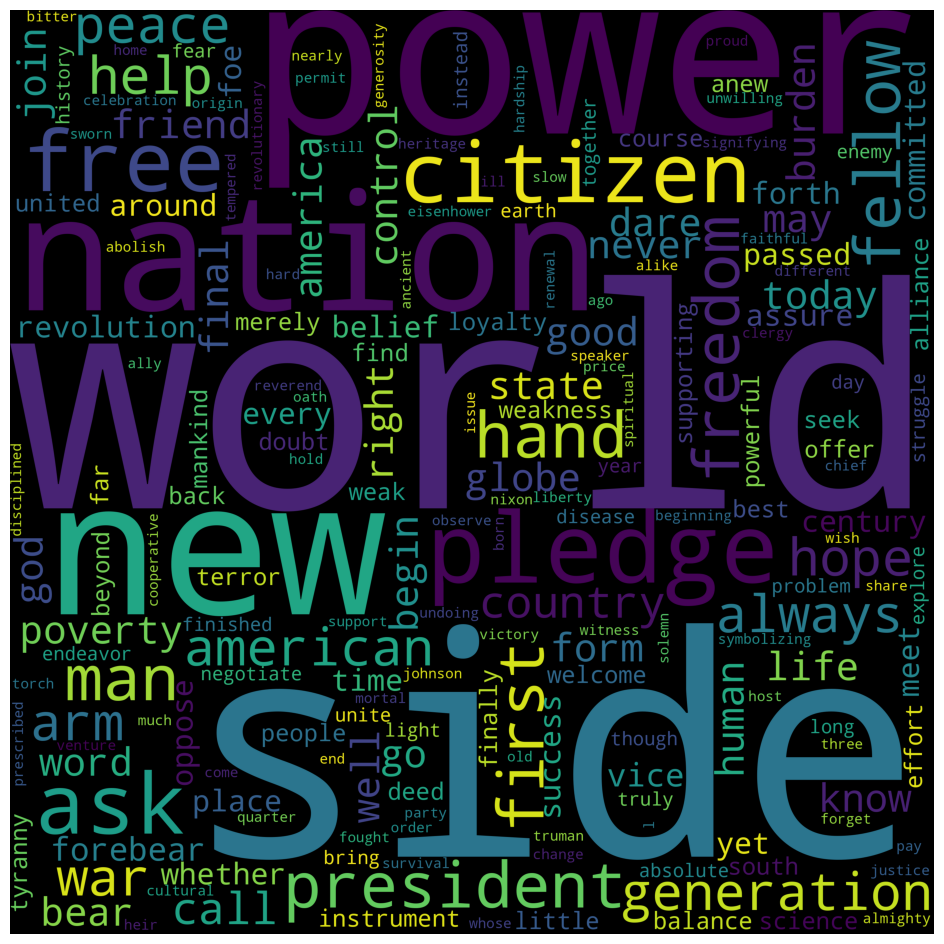



President Richard Nixon's Word Cloud:


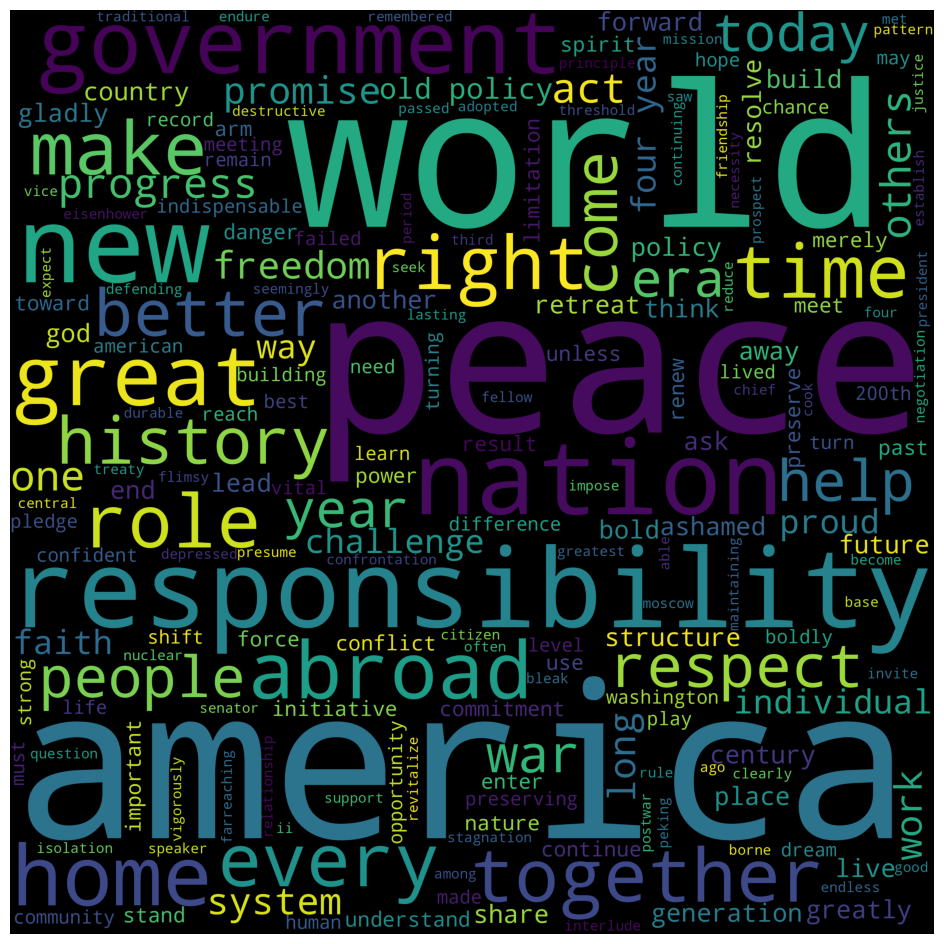

In [23]:
for i in range(0, len(df.index)):
  print("President", names[i] + "'s Word Cloud:")
  wordcloud = WordCloud(width = 3000, height = 3000, min_font_size = 10, random_state=1).generate(df.iloc[i]['Speech'])
  plt.figure(figsize=(12, 12))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
  print('\n')